In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_excel('Ticket Details.xlsx')
data.head()

,Ticket No,Priority,State,Category,Sub Category,Skill Team,Hosting,Create Date,Picked Date,Completed Date,Assignee,Customer Rating,Outcome,Escalated,Reached via
0,T01,High,California,Data Privacy,GDPR,IT,Vendor Cloud,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Bob,Excellent (5),Advised for a risk assessment,NaN,Personal Call
1,T02,Low,Minnesota,Cyber Consultation,BCP/DR,IT,On Prem Server,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Bob,Excellent (5),Recommended Threat Assessment,NaN,Ticket Portal
2,T03,High,Maryland,Cyber Security Breach,Firewall,HR,Vendor Cloud,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Allan,Excellent (5),Recommended Threat Assessment,NaN,Personal Call
3,T04,Low,New York,Security Gap,Password non-expiry,IT,On Prem Server,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Allan,Excellent (5),Advised for a risk assessment,NaN,Ticket Portal
4,T05,High,California,Cyber Security Breach,Malware Attack,Legal,On Prem Cloud,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Charlotte,Excellent (5),Recommended Threat Assessment,NaN,Ticket Portal


In [3]:
# Remove unwanted columns
data = data.drop(['Sub Category', 'Hosting', 'Assignee', 'Escalated'], axis=1)
data.head()

,Ticket No,Priority,State,Category,Skill Team,Create Date,Picked Date,Completed Date,Customer Rating,Outcome,Reached via
0,T01,High,California,Data Privacy,IT,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Excellent (5),Advised for a risk assessment,Personal Call
1,T02,Low,Minnesota,Cyber Consultation,IT,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Excellent (5),Recommended Threat Assessment,Ticket Portal
2,T03,High,Maryland,Cyber Security Breach,HR,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Excellent (5),Recommended Threat Assessment,Personal Call
3,T04,Low,New York,Security Gap,IT,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Excellent (5),Advised for a risk assessment,Ticket Portal
4,T05,High,California,Cyber Security Breach,Legal,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Excellent (5),Recommended Threat Assessment,Ticket Portal


In [4]:
# Look for missing values
data.isna().sum()
# no NA values in our dataset. No action needs to be taken

Ticket No          0
Priority           0
State              0
Category           0
Skill Team         0
Create Date        0
Picked Date        0
Completed Date     0
Customer Rating    0
Outcome            0
Reached via        0
dtype: int64

### 'State' Variable Exploratory Analysis

In [5]:
# Check values in the ‘State’ column and modify it if there are too many similar values
print('STATES REPRESENTED')
print(data['State'].unique())
print('-----------------------------')
print('# OF STATES REPRESENTED:', len(data['State'].unique()))

STATES REPRESENTED
['California' 'Minnesota' 'Maryland' 'New York' 'Texas' 'Utah'
 'New Jersey' 'Iowa' 'Florida' 'Michigan' 'Georgia' 'Louisiana'
 'Connecticut' 'Wisconsin' 'Oregon' 'Virginia' 'Pennsylvania'
 'Rhode Island' 'Ohio' 'Arizona' 'Massachusetts' 'New Mexico' 'Nevada'
 'Illinois' 'North Carolina' 'Missouri' 'Tennessee' 'Kansas' 'Colorado'
 'Indiana' 'Delaware' 'District of Columbia' 'Mississippi' 'Alabama'
 'Washington' 'Kentucky' 'South Carolina' 'Nebraska' 'Hawaii'
 'New Hampshire' 'Idaho' 'West Virginia' 'Maine' 'Oklahoma' 'Montana']
-----------------------------
# OF STATES REPRESENTED: 45


(array([242.,  93.,  50.,  64.,  44.,  59.,  33.,  30.,   6.,   6.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <BarContainer object of 10 artists>)

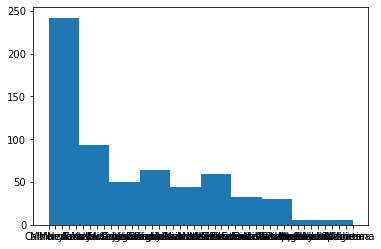

In [6]:
# Visualize distribution
plt.hist(data['State'])

It looks like one state represents a significant part of our data, while a few states have minimal significance. Let's explore this further.

In [7]:
# Check occurences per state
state_counts = data['State'].value_counts()
state_counts

California              131
New York                 56
Florida                  47
Texas                    38
Virginia                 38
Illinois                 25
Utah                     21
Georgia                  19
New Jersey               19
Colorado                 18
Massachusetts            15
Arizona                  15
Pennsylvania             14
North Carolina           14
Ohio                     13
Michigan                 12
Washington               11
Oregon                   10
District of Columbia      9
Maryland                  9
Wisconsin                 8
Minnesota                 8
Missouri                  8
Tennessee                 8
Indiana                   7
Connecticut               6
Iowa                      6
Alabama                   5
Louisiana                 5
Kansas                    5
Nevada                    4
Delaware                  3
Mississippi               3
South Carolina            3
Rhode Island              2
Kentucky            

Most states have less than 10 occurences. Let's keep the ones with more than that in a variable.

In [8]:
relevant_states = []
for state in state_counts.index:
    if state_counts[state] > 10:
        relevant_states.append(state)
relevant_states # states with more than 10 total tickets

['California',
 'New York',
 'Florida',
 'Texas',
 'Virginia',
 'Illinois',
 'Utah',
 'Georgia',
 'New Jersey',
 'Colorado',
 'Massachusetts',
 'Arizona',
 'Pennsylvania',
 'North Carolina',
 'Ohio',
 'Michigan',
 'Washington']

Now, let's compare the amount of tickets which come from California with the tickets from non-relevant states.

In [9]:
# Percent of total tickets that come from California
perc_cal = round(state_counts['California']/len(data['State']), 4) * 100
print('Percentage of tickets which come from California:', perc_cal, '%')

Percentage of tickets which come from California: 20.89 %


In [10]:
# Percent of total tickets which come from non relevant states
total_nonrelevantstates = 0
nonrelevantstate_count = 0
for state in state_counts.index:
    if state not in relevant_states:
        total_nonrelevantstates += state_counts[state]
        nonrelevantstate_count += 1
print('# of non-relevant states:', nonrelevantstate_count)
print('# of tickets from non-relevant states:', total_nonrelevantstates)

perc_nonrelevantstates = round(total_nonrelevantstates/len(data['State']), 4) * 100
print('Percentage of tickets which come from non-relevant states:', perc_nonrelevantstates, '%')

# of non-relevant states: 28
# of tickets from non-relevant states: 121
Percentage of tickets which come from non-relevant states: 19.3 %


We can observe that the number tickets coming from California (20.89%), are around the same as the number of tickets coming from states we labeled as non-relevant (19.3%).

### 'Category' Variable Exploratory Analysis

In [11]:
# Check values in the ‘State’ column and modify it if there are too many similar values
print('CATEGORIES REPRESENTED')
print(data['Category'].unique())
print('-----------------------------')
print('# OF CATEGORIES REPRESENTED:', len(data['Category'].unique()))

CATEGORIES REPRESENTED
['Data Privacy' 'Cyber Consultation' 'Cyber Security Breach'
 'Security Gap' 'Data Leak']
-----------------------------
# OF CATEGORIES REPRESENTED: 5


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

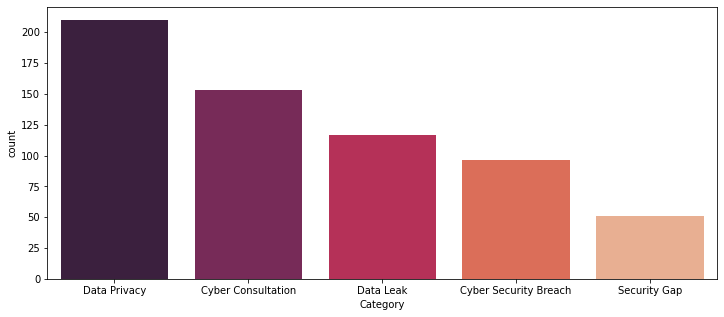

In [12]:
# Visualize distribution
plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(data['Category'], palette = 'rocket', order = data['Category'].value_counts().index)

As can be seen above, data privacy is the most frequent category in our dataset, while security gap is the least frequent.

### 'Customer Rating' Variable Exploratory Analysis

In [13]:
# Transform ‘Customer Rating’ variable into ordinal numerical type (2 - ‘Unsatisfactory (2)’; 3 - ‘Satisfactory (3)’; 4 – ‘Good (4)’; 5 – ‘Excellent (5)’
def transform_crat(val):
    if val == 'Unsatisfactory (2)': 
        return 2
    elif val == 'Satisfactory (3)': 
        return 3
    elif val == 'Good (4)': 
        return 4
    elif val == 'Excellent (5)': 
        return 5
data['Customer Rating (#)'] = data.apply(lambda row: transform_crat(row['Customer Rating']), axis=1)


In [14]:
# Check if all values were converted correctly
print(data.head())
print(data.tail())
# looks good

  Ticket No Priority       State               Category Skill Team  \
0       T01     High  California           Data Privacy         IT   
1       T02      Low   Minnesota     Cyber Consultation         IT   
2       T03     High    Maryland  Cyber Security Breach         HR   
3       T04      Low    New York           Security Gap         IT   
4       T05     High  California  Cyber Security Breach      Legal   

          Create Date         Picked Date       Completed Date  \
0 2021-01-03 12:46:36 2021-01-03 12:48:31  2021-06-03 16:35:26   
1 2021-01-04 09:52:44 2021-01-04 10:12:46  2021-01-17 09:44:31   
2 2021-01-04 10:11:07 2021-01-04 10:11:31  2021-01-04 11:43:40   
3 2021-01-04 10:55:13 2021-01-04 10:55:31  2021-01-18 11:06:54   
4 2021-01-04 21:58:33 2021-01-04 22:13:03  2021-01-11 12:20:42   

  Customer Rating                        Outcome    Reached via  \
0   Excellent (5)  Advised for a risk assessment  Personal Call   
1   Excellent (5)  Recommended Threat Assessment

In [15]:
# Drop 'Customer Rating' column
data = data.drop(['Customer Rating'], axis=1)
data.head()

,Ticket No,Priority,State,Category,Skill Team,Create Date,Picked Date,Completed Date,Outcome,Reached via,Customer Rating (#)
0,T01,High,California,Data Privacy,IT,2021-01-03 12:46:36,2021-01-03 12:48:31,2021-06-03 16:35:26,Advised for a risk assessment,Personal Call,5
1,T02,Low,Minnesota,Cyber Consultation,IT,2021-01-04 09:52:44,2021-01-04 10:12:46,2021-01-17 09:44:31,Recommended Threat Assessment,Ticket Portal,5
2,T03,High,Maryland,Cyber Security Breach,HR,2021-01-04 10:11:07,2021-01-04 10:11:31,2021-01-04 11:43:40,Recommended Threat Assessment,Personal Call,5
3,T04,Low,New York,Security Gap,IT,2021-01-04 10:55:13,2021-01-04 10:55:31,2021-01-18 11:06:54,Advised for a risk assessment,Ticket Portal,5
4,T05,High,California,Cyber Security Breach,Legal,2021-01-04 21:58:33,2021-01-04 22:13:03,2021-01-11 12:20:42,Recommended Threat Assessment,Ticket Portal,5


C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Rating (#)', ylabel='count'>

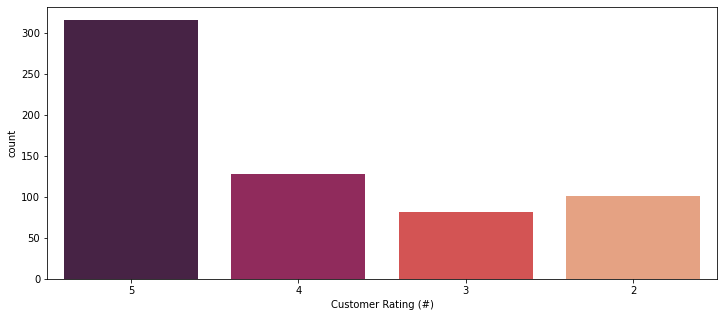

In [17]:
# Visualize distribution
plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(data['Customer Rating (#)'], palette = 'rocket', order = [5,4,3,2])

### 'Create Date' and 'Completed Date' Variables Exploratory Analysis

In [19]:
# Check variation in date between first ticket request and last ticket request

In [20]:
# Visualize ‘Create Date’ variable distribution